In [1]:
import pandas as pd
import json
import matplotlib.pyplot as plt

**Comment:**

Need to upload the following files:

merged_with_gross_classification-table.json

merged_with_gross_classification-reports.json

gross_classifications_group_mapping.json

merged_ranking.txt

**Cheking New Gross Clssification Catrgories**

In [2]:
import json

# adjust the path if needed
with open('/content/gross_classifications_group_mapping.json', 'r') as f:
    mapping = json.load(f)

# Count total keys and those containing '- new'
total = len(mapping)
count_new = sum(1 for key in mapping if 'new' in key.lower())

print("Total unique gross classifications:", total)

Total unique gross classifications: 213


In [3]:
print("Number of keys including 'new':", count_new)

Number of keys including 'new': 184


## Reports Statistics

**Loading Data**

In [4]:
def load_observables(json_path):
    with open(json_path, 'r') as f:
        data = json.load(f)
    records = []
    for fname, info in data.items():
        for obs in info.get('observables', []):
            rec = obs.copy()
            rec['file'] = fname
            records.append(rec)
    return pd.DataFrame(records)

In [5]:
json_path = '/content/merged_with_gross_classification-reports.json'
df_reports = load_observables(json_path)

**Numerical Statistics**

In [6]:
def numeric_summary(df):
    # Total observables
    total_obs = len(df)
    print(f"Total observables: {total_obs}\n")

    # Unique MD files
    num_files = df['file'].nunique()
    print(f"Unique MD files: {num_files}\n")

    # Gross classification counts
    gross_counts = df['gross_classification'].value_counts()
    print(f"Total distinct gross classifications: {gross_counts.size}")
    print("Gross classification counts:")
    print(gross_counts, "\n")

    # Fine classification counts
    fine_counts = df['fine_classification'].value_counts()
    print(f"Total distinct fine classifications: {fine_counts.size}")
    print("Fine classification counts:")
    print(fine_counts, "\n")

    # Top 20 gross classifications
    print("Top 20 gross classifications:")
    print(gross_counts.head(20), "\n")

    # Artifact details counts
    ad_counts = df['artifact_details'].value_counts()
    print("Artifact details counts:")
    print(ad_counts, "\n")

    # Observables per file stats
    obs_per_file = df.groupby('file').size()
    print(f"Observables per file - max: {obs_per_file.max()}, "
          f"min: {obs_per_file.min()}, "
          f"avg: {obs_per_file.mean():.2f}\n")

    # 'New' categories in gross classification
    new_cats = [cat for cat in gross_counts.index if 'new' in cat.lower()]
    print(f"Number of 'new' gross classifications: {len(new_cats)}")
    if new_cats:
        print("New categories:", new_cats, "\n")


In [7]:
numeric_summary(df_reports)

Total observables: 6989

Unique MD files: 65

Total distinct gross classifications: 209
Gross classification counts:
gross_classification
File                             1434
Identifier                        707
Software                          684
Cryptographic Hash – new          339
Device                            262
                                 ... 
Critical Infrastructure – new       1
Disk Structure – new                1
Data Wiper – new                    1
thread attribute – new              1
Activation Timestamp – new          1
Name: count, Length: 209, dtype: int64 

Total distinct fine classifications: 1309
Fine classification counts:
fine_classification
Software/Tool                 474
File Extension                276
File                          269
SHA256 Hash                   185
Malware Family                179
                             ... 
File Format/Archive             1
Category Identifier             1
Malicious DLL                   1
ICS Pro

**Visualizations**

In [8]:
def plot_visualizations(df):
    # Define a professional Tableau-inspired palette
    artifact_colors = ["#4E79A7", "#F28E2B", "#E15759"]   # Mentioned, Described, Actionable
    gross_color = "#76B7B2"  # Soft teal
    fine_color  = "#59A14F"  # Mellow green
    ds_color    = "#B07AA1"  # Dusty purple

    # 1. Artifact Details Distribution
    ad_counts = df['artifact_details'].value_counts()
    plt.figure(figsize=(6, 4))
    bars = ad_counts.plot(kind='bar', color=artifact_colors, edgecolor='black')
    plt.title("Artifact Details Distribution", fontsize=14, weight='bold')
    plt.xlabel("Artifact Details", fontsize=12)
    plt.ylabel("Count", fontsize=12)
    plt.xticks(rotation=45, ha='right')
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    for p in bars.patches:
        bars.annotate(f"{int(p.get_height())}",
                      (p.get_x() + p.get_width()/2, p.get_height() + 5),
                      ha='center', va='bottom', fontsize=10)
    plt.tight_layout()
    plt.show()

    # 2. Top 20 Gross Classifications (largest at top)
    gross_counts = df['gross_classification'].value_counts().head(20)
    gross_sorted = gross_counts.sort_values(ascending=True)
    plt.figure(figsize=(8, 10))
    bars = gross_sorted.plot(kind='barh', color=gross_color, edgecolor='black')
    plt.title("Top 20 Gross Classifications", fontsize=14, weight='bold')
    plt.xlabel("Count", fontsize=12)
    plt.grid(axis='x', linestyle='--', alpha=0.7)
    plt.gca().invert_yaxis()
    for p in bars.patches:
        bars.annotate(f"{int(p.get_width())}",
                      (p.get_width() + 5, p.get_y() + p.get_height()/2),
                      va='center', fontsize=10)
    plt.tight_layout()
    plt.show()

    # 3. Top 20 Fine Classifications (largest at top)
    fine_counts = df['fine_classification'].value_counts().head(20)
    fine_sorted = fine_counts.sort_values(ascending=True)
    plt.figure(figsize=(8, 8))
    bars = fine_sorted.plot(kind='barh', color=fine_color, edgecolor='black')
    plt.title("Top 20 Fine Classifications", fontsize=14, weight='bold')
    plt.xlabel("Count", fontsize=12)
    plt.grid(axis='x', linestyle='--', alpha=0.7)
    plt.gca().invert_yaxis()
    for p in bars.patches:
        bars.annotate(f"{int(p.get_width())}",
                      (p.get_width() + 5, p.get_y() + p.get_height()/2),
                      va='center', fontsize=10)
    plt.tight_layout()
    plt.show()

    # 4. Top 10 Data Sources
    ds_counts = df['data_source'].value_counts().head(10)
    plt.figure(figsize=(8, 4))
    bars = ds_counts.plot(kind='bar', color=ds_color, edgecolor='black')
    plt.title("Top 10 Data Sources", fontsize=14, weight='bold')
    plt.xlabel("Data Source", fontsize=12)
    plt.ylabel("Count", fontsize=12)
    plt.xticks(rotation=45, ha='right')
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    for p in bars.patches:
        bars.annotate(f"{int(p.get_height())}",
                      (p.get_x() + p.get_width()/2, p.get_height() + 2),
                      ha='center', va='bottom', fontsize=10)
    plt.tight_layout()
    plt.show()


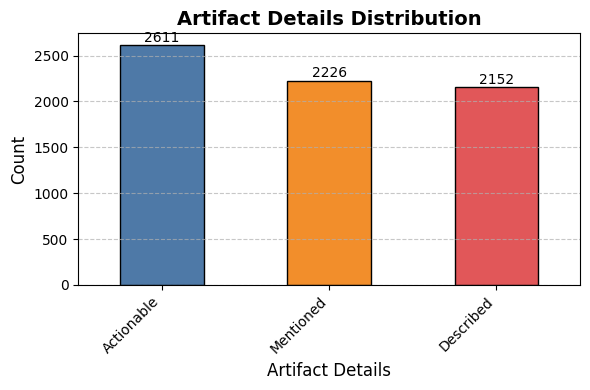

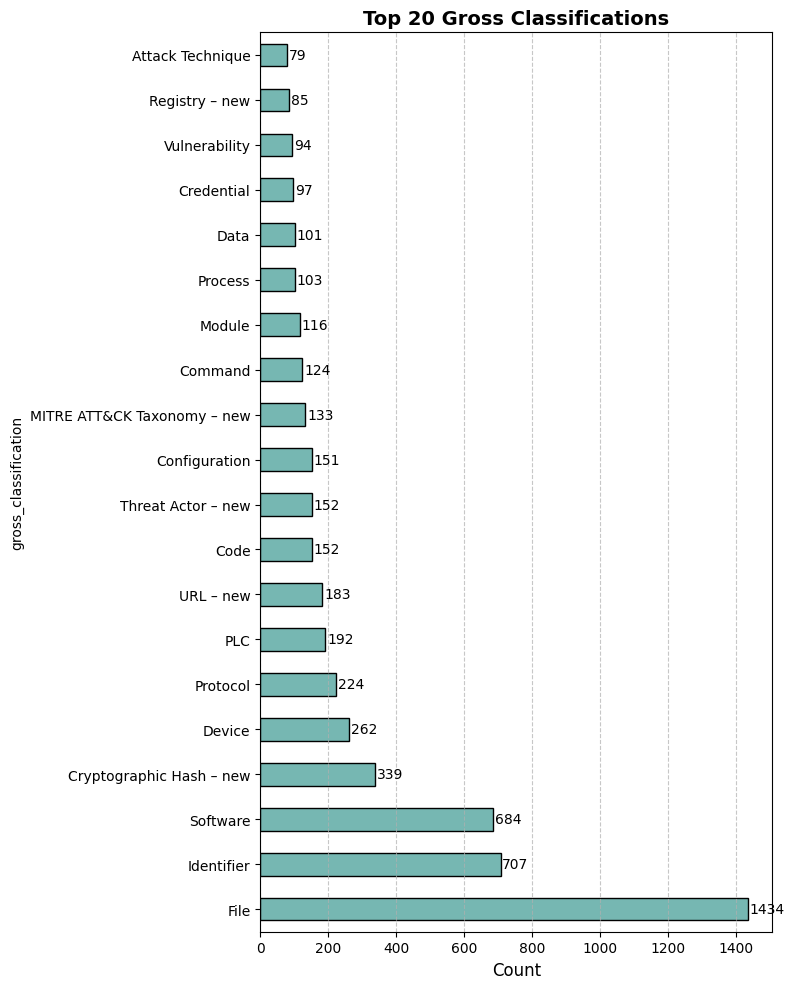

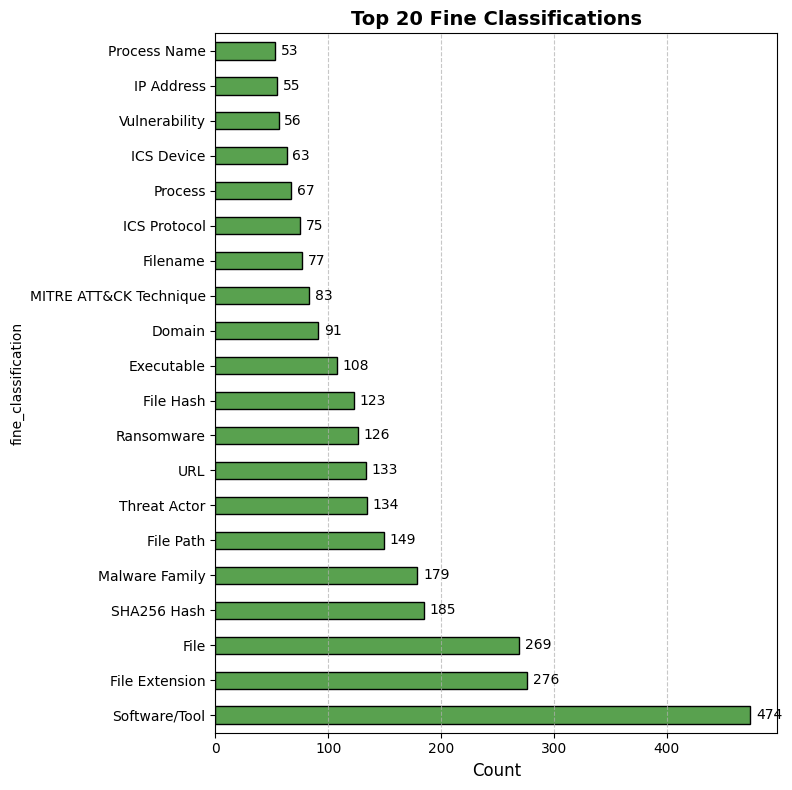

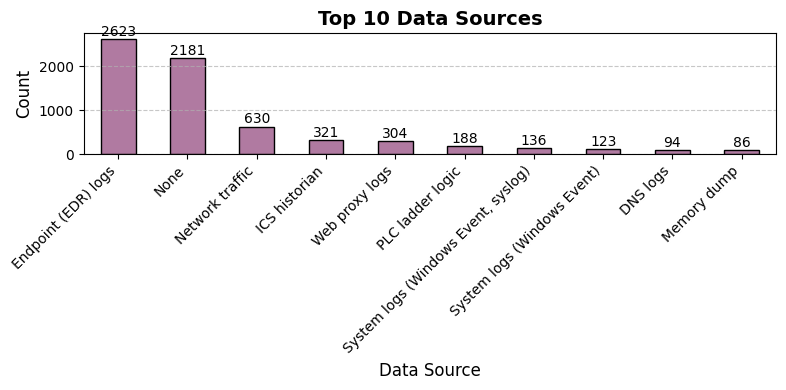

In [9]:
plot_visualizations(df_reports)

## Procedure Description Table Statistics

**Loading Data**

In [14]:
def load_observables(json_path):
    """
    Load and flatten the table JSON into a DataFrame.
    Handles both dict-of-files (with 'observables' lists) and list formats.
    """
    with open(json_path, 'r') as f:
        data = json.load(f)
    records = []
    if isinstance(data, dict) and 'observables' in next(iter(data.values())):
        for fname, info in data.items():
            for obs in info['observables']:
                rec = obs.copy()
                rec['file'] = fname
                records.append(rec)
    else:
        records = data
    return pd.DataFrame(records)

In [15]:
table_path = "/content/merged_with_gross_classification-table.json"
df_table = load_observables(table_path)

**Numerical Statistics**

In [16]:
def numeric_summary_table(df):
    """Print numeric summaries for the table data."""
    print("=== Numeric Summary for Table Data ===\n")

    # Total observables
    total_obs = len(df)
    print(f"Total observables: {total_obs}\n")

    # Unique MD file names
    if 'file' in df.columns:
        unique_files = df['file'].nunique()
        print(f"Unique MD files: {unique_files}\n")

    # Gross classification counts
    gross_counts = df['gross_classification'].value_counts()
    print(f"Total distinct gross classifications: {gross_counts.size}")
    print("Gross classification counts:")
    print(gross_counts, "\n")

    # Fine classification counts
    fine_counts = df['fine_classification'].value_counts()
    print(f"Total distinct fine classifications: {fine_counts.size}")
    print("Fine classification counts:")
    print(fine_counts, "\n")

    # Top 20 gross classifications
    print("Top 20 gross classifications:")
    print(gross_counts.head(20), "\n")

    # Artifact details counts
    ad_counts = df['artifact_details'].value_counts()
    print("Artifact details counts:")
    print(ad_counts, "\n")

    # Top 10 data sources
    ds_counts = df['data_source'].value_counts().head(10)
    print("Top 10 data sources:")
    print(ds_counts, "\n")

    # Observables per file stats
    if 'file' in df.columns:
        obs_per_file = df.groupby('file').size()
        print("Observables per file - max: {}, min: {}, avg: {:.2f}".format(
            obs_per_file.max(), obs_per_file.min(), obs_per_file.mean()
        ))
        print()


In [17]:
numeric_summary_table(df_table)

=== Numeric Summary for Table Data ===

Total observables: 445

Total distinct gross classifications: 50
Gross classification counts:
gross_classification
Software                          56
Command                           43
File                              41
Device                            28
PLC                               26
Configuration                     24
Code                              19
Unknown                           18
Protocol                          16
Data                              13
API                               12
Communication                     12
Connection Port                   11
Module                            10
Service                            9
Information                        8
Identifier                         6
Credential                         6
Log                                5
System                             5
Protocol Field                     5
Hardware                           5
Vulnerability                  

**Visualizations**

In [18]:
def plot_table_visualizations(df):
    """Generate polished, annotated plots for the table data."""
    # Define a professional Tableau-inspired palette
    artifact_colors = ["#4E79A7", "#F28E2B", "#E15759", "#76B7B2", "#59A14F"]
    gross_color     = "#76B7B2"
    fine_color      = "#59A14F"
    ds_color        = "#B07AA1"

    # 1. Artifact Details Distribution
    ad_counts = df['artifact_details'].value_counts()
    plt.figure(figsize=(6,4))
    bars = ad_counts.plot(kind='bar', color=artifact_colors[:len(ad_counts)], edgecolor='black')
    plt.title("Artifact Details Distribution", fontsize=14, weight='bold')
    plt.xlabel("Artifact Details", fontsize=12)
    plt.ylabel("Count", fontsize=12)
    plt.xticks(rotation=45, ha='right')
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    for p in bars.patches:
        bars.annotate(f"{int(p.get_height())}",
                      (p.get_x() + p.get_width()/2, p.get_height()+5),
                      ha='center', va='bottom', fontsize=10)
    plt.tight_layout()
    plt.show()

    # 2. Top 20 Gross Classifications (largest at top)
    gross = df['gross_classification'].value_counts().head(20).sort_values(ascending=True)
    plt.figure(figsize=(8,10))
    bars = gross.plot(kind='barh', color=gross_color, edgecolor='black')
    plt.title("Top 20 Gross Classifications", fontsize=14, weight='bold')
    plt.xlabel("Count", fontsize=12)
    plt.grid(axis='x', linestyle='--', alpha=0.7)
    plt.gca().invert_yaxis()
    for p in bars.patches:
        bars.annotate(f"{int(p.get_width())}",
                      (p.get_width() + 5, p.get_y() + p.get_height()/2),
                      va='center', fontsize=10)
    plt.tight_layout()
    plt.show()

    # 3. Top 20 Fine Classifications (largest at top)
    fine = df['fine_classification'].value_counts().head(20).sort_values(ascending=True)
    plt.figure(figsize=(8,8))
    bars = fine.plot(kind='barh', color=fine_color, edgecolor='black')
    plt.title("Top 20 Fine Classifications", fontsize=14, weight='bold')
    plt.xlabel("Count", fontsize=12)
    plt.grid(axis='x', linestyle='--', alpha=0.7)
    plt.gca().invert_yaxis()
    for p in bars.patches:
        bars.annotate(f"{int(p.get_width())}",
                      (p.get_width() + 5, p.get_y() + p.get_height()/2),
                      va='center', fontsize=10)
    plt.tight_layout()
    plt.show()

    # 4. Top 10 Data Sources
    ds = df['data_source'].value_counts().head(10)
    plt.figure(figsize=(8,4))
    bars = ds.plot(kind='bar', color=ds_color, edgecolor='black')
    plt.title("Top 10 Data Sources", fontsize=14, weight='bold')
    plt.xlabel("Data Source", fontsize=12)
    plt.ylabel("Count", fontsize=12)
    plt.xticks(rotation=45, ha='right')
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    for p in bars.patches:
        bars.annotate(f"{int(p.get_height())}",
                      (p.get_x() + p.get_width()/2, p.get_height()+2),
                      ha='center', va='bottom', fontsize=10)
    plt.tight_layout()
    plt.show()


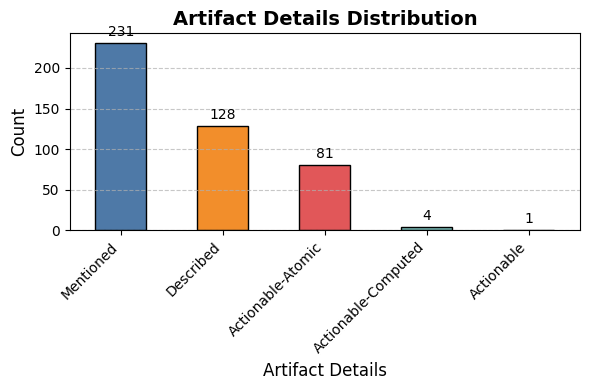

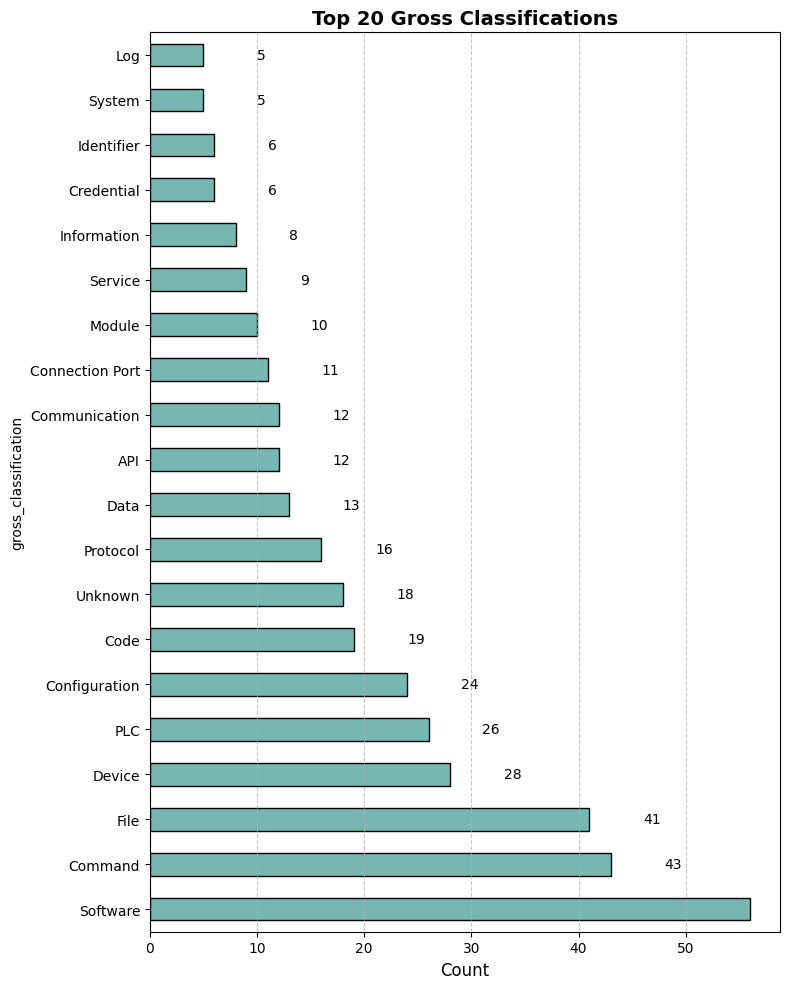

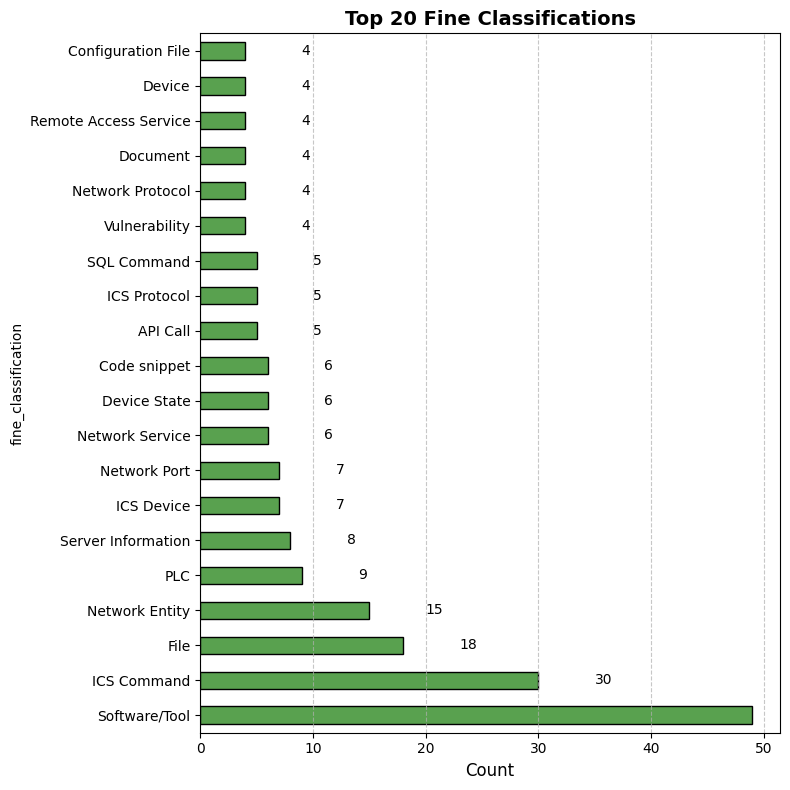

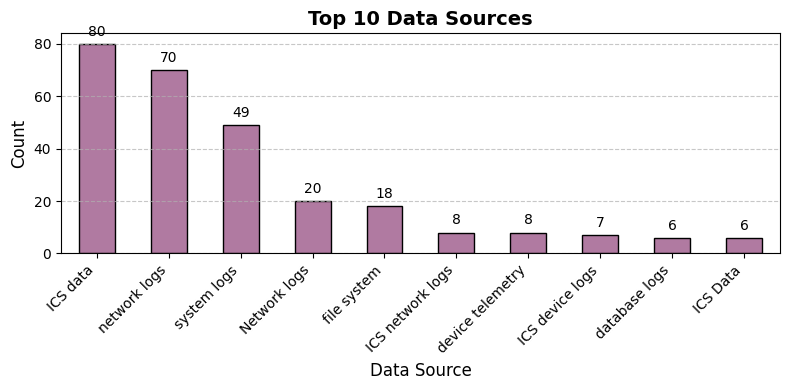

In [19]:
plot_table_visualizations(df_table)

## Ranking Results

**Data Loading**

In [74]:
import pandas as pd
import re

def load_ranking_results(path):
    records = []
    current_file = None
    skipped = 0
    skipped_lines = []

    with open(path, 'r') as f:
        for line_num, line in enumerate(f, 1):
            original_line = line.strip()
            if not original_line or original_line.startswith('====='):
                continue

            if original_line.lower().startswith('md file name:'):
                current_file = original_line.split(':', 1)[1].strip()
                continue

            parsed = False

            # === 1. Parse pipe-delimited lines ===
            if original_line.startswith('|'):
                parts = original_line.split('|')
                if len(parts) >= 4:
                    try:
                        idx = int(parts[1].strip())
                        arrow_part = parts[2].strip()
                        rest_of_line = '|'.join(parts[3:]).strip()

                        if '→' in arrow_part:
                            obs_val, orig_rank = [s.strip('` ') for s in arrow_part.split('→', 1)]
                        else:
                            obs_val, orig_rank = '', arrow_part.strip()

                        if 'INCORRECT' in rest_of_line:
                            judgment = 'INCORRECT'
                            m = re.search(r'should be "([^"]+)"', rest_of_line)
                            should_be = m.group(1) if m else None
                        else:
                            judgment = 'CORRECT'
                            should_be = orig_rank

                        records.append({
                            'file': current_file,
                            'observable_id': idx,
                            'observable_value': obs_val,
                            'original_rank': orig_rank,
                            'validator_judgment': judgment,
                            'should_be_rank': should_be,
                            'raw_line': original_line
                        })
                        parsed = True
                    except Exception:
                        pass

            # === 2. Fallback: non-pipe INCORRECT lines ===
            if not parsed and '→' in original_line and 'INCORRECT' in original_line:
                try:
                    arrow_part, rest = original_line.split('→', 1)
                    obs_val = arrow_part.strip(' `"\'')

                    rank_and_judgment = rest.split('|', 1)
                    if len(rank_and_judgment) >= 2:
                        orig_rank = rank_and_judgment[0].strip(' `"\'')

                        rest_of_line = rank_and_judgment[1]
                        judgment = 'INCORRECT'
                        m = re.search(r'should be "([^"]+)"', rest_of_line)
                        should_be = m.group(1) if m else None

                        records.append({
                            'file': current_file,
                            'observable_id': -1,
                            'observable_value': obs_val,
                            'original_rank': orig_rank,
                            'validator_judgment': judgment,
                            'should_be_rank': should_be,
                            'raw_line': original_line
                        })
                        parsed = True
                except Exception:
                    pass

            # === 3. Fallback: non-pipe CORRECT lines ===
            if not parsed and '→' in original_line and 'CORRECT' in original_line:
                try:
                    arrow_part, rest = original_line.split('→', 1)
                    obs_val = arrow_part.strip(' `"\'')

                    rank_and_judgment = rest.split('|', 1)
                    if len(rank_and_judgment) >= 1:
                        orig_rank = rank_and_judgment[0].strip(' `"\'')

                        records.append({
                            'file': current_file,
                            'observable_id': -1,
                            'observable_value': obs_val,
                            'original_rank': orig_rank,
                            'validator_judgment': 'CORRECT',
                            'should_be_rank': orig_rank,
                            'raw_line': original_line
                        })
                        parsed = True
                except Exception:
                    pass

            # === 4. Still not parsed? Log it ===
            if not parsed:
                skipped += 1
                skipped_lines.append((line_num, original_line))

    print(f"✅ Parsed {len(records)} records")
    print(f"⚠️ Skipped {skipped} lines due to formatting issues\n")

    if skipped > 0:
        print("🔍 Sample of skipped lines:")
        for i, (line_num, text) in enumerate(skipped_lines[:6]):
            print(f"{line_num:>4}: {text}")

    return pd.DataFrame(records)


In [75]:
# Load, summarize, and plot
df_rank = load_ranking_results('/content/merged_ranking.txt')

✅ Parsed 6267 records
⚠️ Skipped 307 lines due to formatting issues

🔍 Sample of skipped lines:
 693: |----------------------|-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
 694: | 3                    | [+] Whats Happen? [+]
 695: | 4<br>ഗ               | Your files are encrypted, and currently unavailable. You can check it: all files on
 696: | ნ                    | you computer has expansion {EXT}.<br>By the way, everything is possible to recover (restore), but you need to follow our<br>instructions. Otherwise, you cant return your data (NEVER).
 697: | 7<br>8<br>g          | [+] What guarantees? [+]
 698: | 10                   | Its just a business. We absolutely do not care about you and your deals, except<br>getting benefits. If we do not do our work and liabilities - nobody will not<br>cooperate with us. Its not in o

**Numerical Statistics**

In [76]:
def numeric_summary_ranking(df):
    total = len(df)
    correct = df['validator_judgment'].eq('CORRECT').sum()
    incorrect = df['validator_judgment'].eq('INCORRECT').sum()
    acc = correct / total * 100
    print("=== Ranking Validation Summary ===")
    print(f"Total: {total}, Correct: {correct}, Incorrect: {incorrect}")
    print(f"Overall accuracy: {acc:.2f}%\n")
    by_orig = df.groupby('original_rank')['validator_judgment'] \
                .value_counts().unstack(fill_value=0)
    by_orig['accuracy_pct'] = by_orig['CORRECT'] / by_orig.sum(axis=1) * 100
    print("Accuracy by Original Rank (%):")
    print(by_orig[['CORRECT','INCORRECT','accuracy_pct']], "\n")
    mis = df[df['validator_judgment']=='INCORRECT']
    pairs = mis.groupby(['original_rank','should_be_rank']) \
               .size().sort_values(ascending=False).head(10)
    print("Top 10 misclassification mappings:")
    print(pairs, "\n")

In [78]:
numeric_summary_ranking(df_rank)

=== Ranking Validation Summary ===
Total: 6267, Correct: 5967, Incorrect: 300
Overall accuracy: 95.21%

Accuracy by Original Rank (%):
validator_judgment                                  CORRECT  INCORRECT  \
original_rank                                                            
                                                         20          5   
"                                                        12          4   
" Q "                                                     1          0   
" \$ DWGCODE PAGE "                                       1          0   
" g "                                                     1          0   
"#### Message 2: Connection setup\n\n                     1          0   
"2"                                                       1          0   
"20"                                                      1          0   
"3 "                                                      1          0   
"300"                                              

**Visualizations**

In [83]:
def plot_ranking_visualizations(df):
    # Work on a copy so we don’t mutate original
    df_viz = df.copy()
    df_viz['validator_judgment'] = df_viz['validator_judgment'].str.strip().str.capitalize()
    df_viz['original_rank'] = df_viz['original_rank'].str.strip().str.capitalize()

    # === 1. Plot all Correct vs Incorrect (full df, no filtering)
    counts = df_viz['validator_judgment'].value_counts()
    colors = ["#4E79A7", "#E15759"]  # Blue, Red
    plt.figure(figsize=(6, 4))
    bars = counts.plot(kind='bar', color=colors, edgecolor='black')
    plt.title("Validator: Correct vs Incorrect", weight='bold')
    plt.xlabel("Judgment")
    plt.ylabel("Count")
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    for p in bars.patches:
        bars.annotate(int(p.get_height()),
                      (p.get_x() + p.get_width() / 2, p.get_height() + 5),
                      ha='center', va='bottom')
    plt.tight_layout()
    plt.show()

    # === 2. Accuracy by valid ranks only
    valid_ranks = ["Mentioned", "Described", "Actionable"]
    df_clean = df_viz[df_viz['original_rank'].isin(valid_ranks)]

    by_orig = (
        df_clean
        .groupby('original_rank')['validator_judgment']
        .value_counts()
        .unstack(fill_value=0)
    )
    by_orig['accuracy_pct'] = by_orig['Correct'] / by_orig.sum(axis=1) * 100
    accuracy = by_orig['accuracy_pct'].sort_values(ascending=True)

    plt.figure(figsize=(8, 6))
    bars = accuracy.plot(kind='barh', color="#76B7B2", edgecolor='black')
    plt.title("Accuracy by Original Rank", weight='bold')
    plt.xlabel("Accuracy (%)")
    plt.grid(axis='x', linestyle='--', alpha=0.7)
    for p in bars.patches:
        bars.annotate(f"{p.get_width():.1f}%",
                      (p.get_width() + 1, p.get_y() + p.get_height() / 2),
                      va='center')
    plt.tight_layout()
    plt.show()


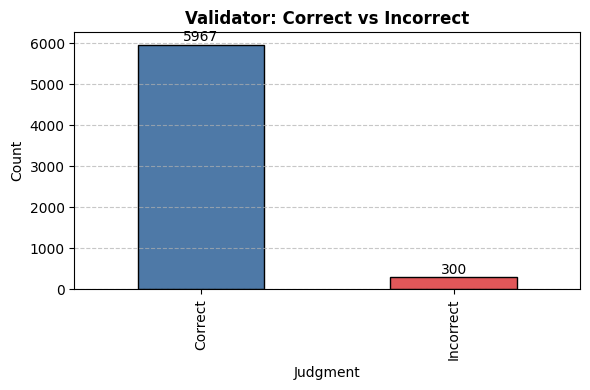

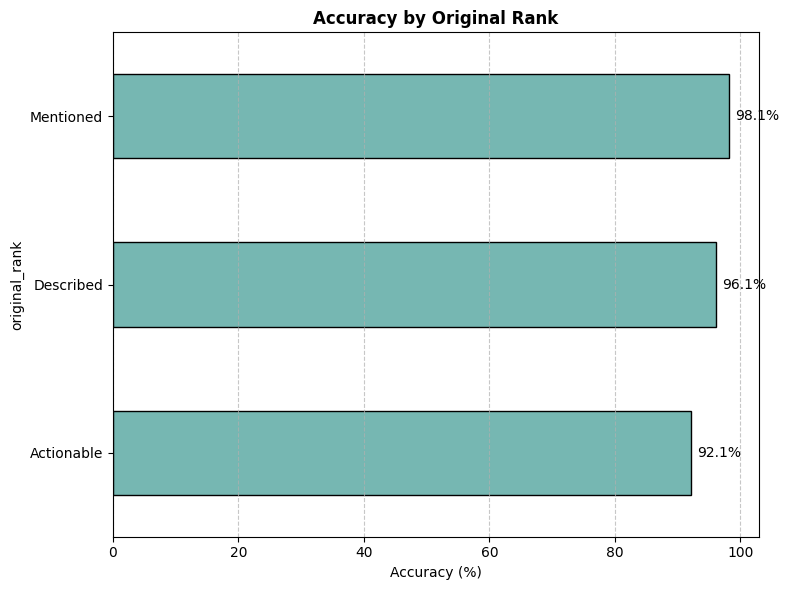

In [84]:
plot_ranking_visualizations(df_rank)